## CIS 635 Project

### Leveraging Data Mining to Understand and Predict Airbnb Listing Prices

#### Loading required libraries

In [42]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### Downloading data from kaggle website

The data we are using for this project is hosted in kaggle. [U.S. Airbnb Open Data](https://www.kaggle.com/datasets/kritikseth/us-airbnb-open-data)

#### Downloading datasets in csv format

In [23]:
#Path to the dataset
path = kagglehub.dataset_download("kritikseth/us-airbnb-open-data")


In [24]:
#Connecting to files in path
csv_path1 = os.path.join(path, "AB_US_2020.csv")
csv_path2 = os.path.join(path, "AB_US_2023.csv")
#Load the data from CSV files
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
#Previewing the two datasets
print(df1.describe())
print(df2.describe())

C:\Users\obadi\AppData\Local\Temp\ipykernel_10932\798040142.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(csv_path1)
C:\Users\obadi\AppData\Local\Temp\ipykernel_10932\798040142.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(csv_path2)


                 id       host_id       latitude      longitude  \
count  2.260300e+05  2.260300e+05  226030.000000  226030.000000   
mean   2.547176e+07  9.352385e+07      35.662829    -103.220662   
std    1.317814e+07  9.827422e+07       6.849855      26.222091   
min    1.090000e+02  2.300000e+01      18.920990    -159.714900   
25%    1.515890e+07  1.399275e+07      32.761783    -118.598115   
50%    2.590916e+07  5.138266e+07      37.261125     -97.817200   
75%    3.772624e+07  1.497179e+08      40.724038     -76.919323   
max    4.556085e+07  3.679176e+08      47.734620     -70.995950   

               price  minimum_nights  number_of_reviews  reviews_per_month  \
count  226030.000000    2.260300e+05      226030.000000       177428.00000   
mean      219.716529    4.525490e+02          34.506530            1.43145   
std       570.353609    2.103376e+05          63.602914            1.68321   
min         0.000000    1.000000e+00           0.000000            0.01000   
25%   

In [25]:
#checking the length of columns in df1 and df2
print(f'Columns in df1 = {len(df1.columns)}')
print(f'Columns in df2 = {len(df2.columns)}')

Columns in df1 = 17
Columns in df2 = 18


In [26]:
#Selecting columns common in both df1 and df2 before concatenating the dataframes
df1_cols = set(df1.columns)
df2_cols = set(df2.columns)

#Common columns
common = df1_cols & df2_cols
unique_to_df2 = df2_cols - df1_cols
print("Common columns:", common)
print("Columns unique to df2:", unique_to_df2)

Common columns: {'latitude', 'room_type', 'availability_365', 'id', 'host_id', 'last_review', 'longitude', 'neighbourhood_group', 'reviews_per_month', 'number_of_reviews', 'minimum_nights', 'price', 'host_name', 'name', 'neighbourhood', 'city', 'calculated_host_listings_count'}
Columns unique to df2: {'number_of_reviews_ltm'}


In [27]:
# Finding unique columns in df1 (columns that are in df1 but not in df2)
unique_df1 = df1_cols - df2_cols
print("\nColumns unique to df1:", unique_df1)
# Finding unique columns in df2 (columns that are in df2 but not in df1)
unique_df2 = df2_cols - df1_cols
print("\nColumns unique to df2:", unique_df2)


Columns unique to df1: set()

Columns unique to df2: {'number_of_reviews_ltm'}


In [28]:
#selecting only common columns in df2 to merge df1.
df2 = df2[list(common)]
len(df2.columns)

17

In [29]:
#concatenating df1 and df2
joined_df = pd.concat([df1, df2], axis=0, ignore_index=True)
merged_df = joined_df.copy()

In [30]:
joined_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [31]:
joined_df.shape

(458177, 17)

The dataframe consists of 458177 entries and 17 variables.

In [32]:
#Checking the data types of various variables in the dataframe.
print(joined_df.info(show_counts=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458177 entries, 0 to 458176
Data columns (total 17 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   name                            object 
 2   host_id                         int64  
 3   host_name                       object 
 4   neighbourhood_group             object 
 5   neighbourhood                   object 
 6   latitude                        float64
 7   longitude                       float64
 8   room_type                       object 
 9   price                           int64  
 10  minimum_nights                  int64  
 11  number_of_reviews               int64  
 12  last_review                     object 
 13  reviews_per_month               float64
 14  calculated_host_listings_count  int64  
 15  availability_365                int64  
 16  city                            object 
dtypes: float64(3), int64(7), obje

#### Checking the number of missing values for every column in joined df

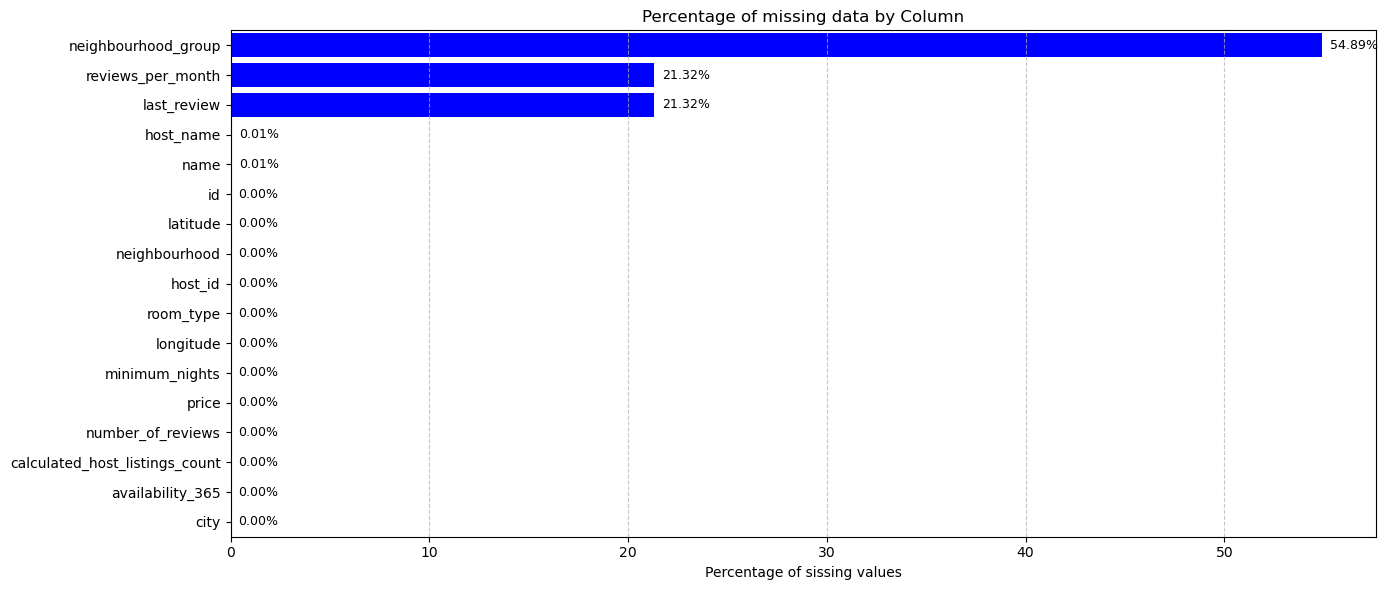

In [37]:
missing_counts = joined_df.isnull().sum()
missing_df = pd.DataFrame({'column': missing_counts.index, 
                           'missing_percent': (missing_counts.values/len(joined_df))*100
                           })
missing_df = missing_df.sort_values(by='missing_percent', ascending=False)
plt.figure(figsize=(14, 6))
bars = plt.barh(missing_df['column'], missing_df['missing_percent'], color='blue')
plt.ylim(-0.5, len(missing_df['column']) - 0.5)
plt.xlabel('Percentage of sissing values')
plt.title('Percentage of missing data by Column')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
for bar, percent in zip(bars, missing_df['missing_percent']):
    plt.text(percent + 0.4, bar.get_y() + bar.get_height()/2,
             f'{percent:.2f}%', va='center', fontsize=9)
plt.tight_layout()
plt.show()

Neighbourhood_group variable has the highest number of missing values at 54.89% of the total entries for neighbourhood_group. Reviews_per_month and last_review both have 21.32% of missing values. host_name and name have 0.01% of missing values which is negligible.

In [85]:
cleaned_df = joined_df.drop('neighbourhood_group', axis=1)
cleaned_df.shape

(458177, 16)

The consequences of dropping missign values from the dataframe results to a reduction of the number of entries from 450,000 plus to 157742.Since the number of missing values in neighbourhood_group is more than half, it makes more sense to drop the variable.

### Checking for noise in the dataframe

<Axes: xlabel='minimum_nights', ylabel='Count'>

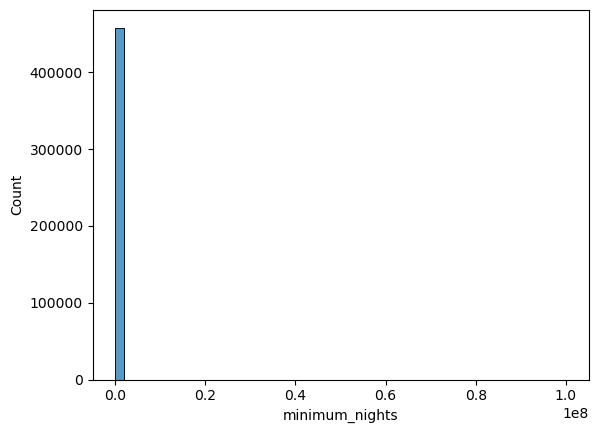

In [86]:
sns.histplot(cleaned_df['minimum_nights'], bins=50, kde=False)

In [87]:
cleaned_df['minimum_nights'].unique()

array([        1,        30,         7,         3,        28,        90,
               4,         2,        21,        29,        14,        60,
             180,       120,        27,         5,         6,        20,
              25,        26,        31,       365,        32,        15,
              10,       360,        45,       100,        19,        68,
              83,       183,        99,        12,       240,       150,
             175,         9,        18,        43,       168,         8,
              13,       186,       300,       500,        76,        59,
              93,       200,       110,        40,       182,       290,
             999,        91,        56,        33,      1000,        35,
             600,       153,        92,       400,       160,        50,
             271,        55,       364,        11,        95,       210,
              16,        23,        80,        89,        85,       118,
              22,        75,       187,        36, 

In [88]:
# Find indexes where minimum_nights > 10 in cleaned_df
idx_min_gt_10 = cleaned_df.index[cleaned_df['minimum_nights'] > 10].tolist()
print(f'Total rows with minimum_nights > 10: {len(idx_min_gt_10)}')
# Show first 20 indexes as a sample
print('Sample indexes (first 20):', idx_min_gt_10[:40])
# Optionally display the corresponding rows (first 10)
display(cleaned_df.loc[idx_min_gt_10[:40]])

Total rows with minimum_nights > 10: 127745
Sample indexes (first 20): [2, 4, 8, 9, 10, 16, 17, 19, 38, 44, 54, 56, 59, 60, 63, 64, 69, 70, 73, 74, 75, 77, 79, 86, 87, 88, 94, 104, 105, 106, 112, 121, 136, 137, 138, 147, 149, 153, 168, 169]


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville
8,259576,"Private, peaceful, and free goat therapy",1362726,Julia,28805,35.61929,-82.48114,Entire home/apt,71,28,537,05/04/20,5.01,1,207,Asheville
9,295496,The Fern Street Apt near Biltmore,1501882,Debbie,28803,35.55537,-82.53539,Entire home/apt,50,90,31,14/06/19,0.29,1,339,Asheville
10,304379,Refocus Cottage - paradise,1566145,Gayle,28804,35.64453,-82.52586,Entire home/apt,289,30,24,03/08/19,0.23,2,0,Asheville
16,498089,Urban Getaway - Perfect Location,2164379,Anne Marie,28801,35.61115,-82.54376,Entire home/apt,50,30,130,17/02/20,1.29,1,141,Asheville
17,528535,Dwntwn Studio w/ lots of character,2596933,B,28801,35.60075,-82.55390,Entire home/apt,97,30,352,02/08/20,3.50,2,32,Asheville
19,621243,The birdhouse.Sweet suite! Downtown Roof top d...,3079174,Molly,28801,35.60418,-82.54964,Entire home/apt,160,30,69,10/09/20,2.25,1,161,Asheville
38,977054,The Cottage In Asheville,4302936,Anne & Joe,28804,35.61570,-82.55594,Entire home/apt,130,30,80,15/03/20,0.93,1,0,Asheville
44,1212352,Downtown Get Around #1,6618494,Reid,28801,35.59942,-82.56189,Entire home/apt,88,30,257,25/08/20,2.95,3,53,Asheville


In [50]:
#Discuss on what an average stay in an airbnb should be and decide on a threshold to clean the data.

In [89]:
over_100000 = cleaned_df.index[cleaned_df['price'] == 100000]
cleaned_df.drop(over_100000, inplace=True)

In [90]:
cleaned_df['price'].describe()

count    458174.000000
mean        239.204418
std         792.257576
min           0.000000
25%          82.000000
50%         135.000000
75%         229.000000
max       99999.000000
Name: price, dtype: float64

In [91]:
# Find indexes where minimum_nights > 10 in cleaned_df
highest_cost = 15000
idx_min_gt_10 = cleaned_df.index[(cleaned_df['price']<=0)|(cleaned_df['price']>=highest_cost)].tolist()
print(f'Total rows with minimum_nights > 10: {len(idx_min_gt_10)}')
# Show first 20 indexes as a sample
print('Sample indexes (first 20):', idx_min_gt_10[:40])
# Optionally display the corresponding rows (first 10)
display(cleaned_df.loc[idx_min_gt_10[:40]])

Total rows with minimum_nights > 10: 319
Sample indexes (first 20): [1845, 1846, 1950, 11106, 15171, 15218, 18071, 18344, 33458, 55106, 56120, 56176, 57668, 60450, 61834, 61875, 61913, 61925, 61941, 61943, 64199, 65505, 68239, 68492, 69986, 83989, 84194, 90582, 93283, 96573, 98338, 99461, 99503, 99763, 99822, 99924, 99925, 99980, 99981, 100262]


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
1845,42513939,Almost Heaven Too,303909632,Thomas,28704,35.46876,-82.50776,Entire home/apt,24999,2,5,09/08/20,1.55,4,253,Asheville
1846,42513942,Almost Heaven,303909632,Thomas,28704,35.46809,-82.50764,Entire home/apt,24999,2,4,29/06/20,0.62,4,258,Asheville
1950,43924301,Haw Creek Escape: Right on the doorstep of Dow...,96187307,Steve,28805,35.59742,-82.50561,Entire home/apt,24999,2,0,NaN,NaN,26,236,Asheville
11106,42738847,Hotel Granduca Austin,314291208,Hotel Granduca,78746,30.30181,-97.82910,Hotel room,0,1,0,NaN,NaN,1,0,Austin
15171,41740613,The Revolution Hotel,228911273,The Revolution Hotel,South End,42.34591,-71.07090,Hotel room,0,1,0,NaN,NaN,1,0,Boston
15218,42065558,Boston Fenway Inn,308490585,Boston Fenway Inn,Fenway,42.34637,-71.08882,Hotel room,0,1,0,NaN,NaN,1,0,Boston
18071,18841208,GREAT LAKE VIEW ROOM FOR RENT,122563804,Francisco,Oakland Park,26.18349,-80.19390,Private room,0,1,1,29/06/17,0.03,1,0,Broward County
18344,20477892,Sea Esta 3 bedroom waterfront pool home,9743916,Michelle,Pompano Beach,26.21769,-80.10857,Entire home/apt,0,3,5,13/05/19,0.18,4,358,Broward County
33458,43078540,Found Hotel Chicago River North,315027620,Found Hotel Chicago River North,Near North Side,41.89288,-87.63377,Hotel room,0,1,0,NaN,NaN,1,0,Chicago
55106,18635070,4 Bedrooms! New Listing! Pool! Ocean Views! Go...,680107,Kahea,North Kona,19.64033,-155.96396,Entire home/apt,24999,3,2,13/04/18,0.06,127,0,Hawaii


In [92]:
cleaned_df = cleaned_df.drop(idx_min_gt_10)

In [96]:
# Find indexes where minimum_nights > 10 in cleaned_df
highest_cost = 15000
idx_min_gt_10 = cleaned_df.index[(cleaned_df['price']>2000)&(cleaned_df['price']<=highest_cost)].tolist()
print(f'Total rows with minimum_nights > 10: {len(idx_min_gt_10)}')
# Show first 20 indexes as a sample
print('Sample indexes (first 20):', idx_min_gt_10[:40])
# Optionally display the corresponding rows (first 10)
display(cleaned_df.loc[idx_min_gt_10[:40]])
cleaned_df = cleaned_df.drop(idx_min_gt_10)

Total rows with minimum_nights > 10: 3263
Sample indexes (first 20): [1231, 2258, 2342, 2427, 2472, 2687, 2740, 2817, 3030, 3082, 3150, 3228, 3259, 3764, 3766, 3807, 3823, 4087, 4214, 4447, 4677, 4733, 4853, 5220, 5267, 5271, 5565, 5578, 5595, 5823, 5877, 5878, 5900, 5920, 6005, 6006, 6055, 6078, 6247, 6271]


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
1231,32067034,Cozy Cottage on the Creek,134903005,Carolina Mornings,28804,35.64810,-82.62892,Entire home/apt,10000,1,0,NaN,NaN,18,83,Asheville
2258,367789,Completely Renovated Mid Century,1856695,John,78703,30.30665,-97.77151,Entire home/apt,2150,4,1,17/03/14,0.01,1,0,Austin
2342,706950,Walk to Zilker - 4 bedroom 3.5 bath,3633458,Brent,78703,30.28251,-97.77571,Entire home/apt,2250,5,0,NaN,NaN,1,0,Austin
2427,925980,Luxury Hill Country Condo Awaits...,3175045,Ryan,78749,30.22530,-97.86655,Private room,5021,3,2,30/08/16,0.02,1,0,Austin
2472,968064,"East Austin, 6BR near Downtown",2852262,Kate,78702,30.25041,-97.72592,Entire home/apt,2200,3,2,12/03/14,0.02,3,365,Austin
2687,2183136,LEASE: Gorgeous 2-Home Compound,750379,Teresa & Rino,78704,30.24833,-97.75487,Entire home/apt,5000,30,0,NaN,NaN,1,365,Austin
2740,2345033,SXSW House only 10 mins to Downtown,11975520,Ivy,78746,30.27678,-97.80504,Entire home/apt,2500,5,0,NaN,NaN,1,0,Austin
2817,2459312,SXSW Rental - House - Sleeps 12+,12574160,Nick,78737,30.21682,-97.99589,Entire home/apt,2500,1,0,NaN,NaN,1,0,Austin
3030,4078567,4 Bed Walking Distance to ACL,21155894,Kristofer,78704,30.25604,-97.75157,Entire home/apt,2100,3,0,NaN,NaN,1,0,Austin
3082,4217792,Entire Apt ON Town Lake 4 ACL,21890477,Jd,78704,30.26521,-97.76285,Entire home/apt,2500,2,7,04/10/16,0.10,2,365,Austin


<Axes: xlabel='price'>

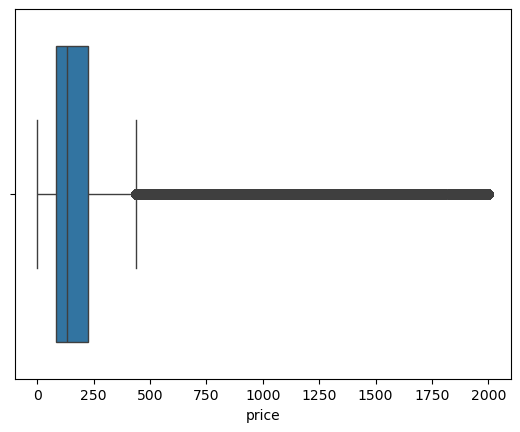

In [97]:
sns.boxplot(x=cleaned_df['price'])

In [63]:
# Find indexes where minimum_nights > 10 in cleaned_df
idx_min_gt_10 = cleaned_df.index[cleaned_df['availability_365'] > 365].tolist()
print(f'Total rows with minimum_nights > 10: {len(idx_min_gt_10)}')
# Show first 20 indexes as a sample
print('Sample indexes (first 20):', idx_min_gt_10[:40])
# Optionally display the corresponding rows (first 10)
display(cleaned_df.loc[idx_min_gt_10[:40]])

Total rows with minimum_nights > 10: 0
Sample indexes (first 20): []


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city


In [67]:
# Find indexes where minimum_nights > 10 in cleaned_df
idx_min_gt_10 = cleaned_df.index[cleaned_df['number_of_reviews'] > 700].tolist()
print(f'Total rows with minimum_nights > 10: {len(idx_min_gt_10)}')
# Show first 20 indexes as a sample
print('Sample indexes (first 20):', idx_min_gt_10[:40])
# Optionally display the corresponding rows (first 10)
display(cleaned_df.loc[idx_min_gt_10[:40]])

Total rows with minimum_nights > 10: 279
Sample indexes (first 20): [23, 80, 82, 102, 2154, 2456, 2457, 2501, 2550, 2863, 44041, 44235, 49096, 49128, 73194, 74403, 104620, 104623, 104624, 104723, 104843, 148564, 166117, 166412, 166648, 166655, 166707, 170650, 181875, 182181, 194161, 194440, 194452, 204074, 204386, 205649, 205711, 206144, 207094, 218736]


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
23,695196,"Private, Downtown & River Arts",3552264,Michelle,28801,35.58131,-82.55741,Private room,52,1,966,13/09/20,9.93,2,334,Asheville
80,2296152,Victorian Cottage Downtown Green Rm,7535860,Rita,28801,35.60403,-82.56101,Private room,88,1,748,18/08/20,9.30,3,0,Asheville
82,2411109,Victorian Cottage Downtown Blue Rm,7535860,Rita,28801,35.60048,-82.55759,Private room,87,1,791,06/09/20,9.99,3,329,Asheville
102,3314819,Basement: Mountainside Private Room & Private ...,16296123,Allison & Peter,28803,35.49099,-82.51287,Private room,47,1,790,12/09/20,10.37,3,0,Asheville
2154,202187,South Congress Studio Apartment,989596,John,78704,30.24776,-97.74527,Entire home/apt,65,1,744,25/08/20,6.80,2,312,Austin
2456,949922,"Vintage Airstream in East Austin, Texas",5152543,Marcella,78723,30.29940,-97.67747,Entire home/apt,69,1,818,02/09/20,8.88,2,313,Austin
2457,951272,Downtown Austin Texas Condo,1648173,Kristen,78701,30.28086,-97.74529,Entire home/apt,76,1,735,13/09/20,8.01,2,328,Austin
2501,1021139,Backyard Cottage in Central Austin,5620519,Steve,78722,30.29087,-97.71895,Entire home/apt,90,1,951,04/04/20,10.54,1,0,Austin
2550,1462311,Stay and Enjoy The Austin Texas House South Co...,740347,Chris,78704,30.24705,-97.75555,Entire home/apt,123,1,827,16/09/20,9.84,1,313,Austin
2863,2528473,Garden Cottage in East Austin,5152543,Marcella,78723,30.29722,-97.68262,Entire home/apt,75,1,704,03/09/20,8.88,2,334,Austin
